In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics, svm,decomposition

In [2]:
lfw_data = datasets.fetch_lfw_people(min_faces_per_person = 100, resize=0.4)
lfw_data.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [3]:
lfw_data.data.shape

(1140, 1850)

In [4]:
lfw_data.target_names
np.unique(lfw_data.target, return_counts = True)

(array([0, 1, 2, 3, 4]), array([236, 121, 530, 109, 144]))

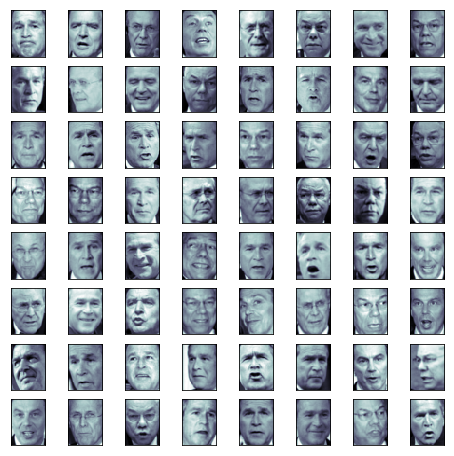

In [5]:
fig = plt.figure(figsize = (8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_data.images[i], cmap = plt.cm.bone)
plt.show()

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(lfw_data.data, lfw_data.target, test_size=0.25, random_state=0) 

In [7]:
#pca = decomposition.PCA()
#pca.fit(x_train)
#x_train.shape

In [8]:
#k = 0
#total = 0
#while total < 0.95:
#    total = total + pca.explained_variance_ratio_[k]
#    k = k + 1
#k

In [30]:
pca = decomposition.PCA(n_components=131, whiten = True).fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [31]:
x_train_pca.shape, x_test_pca.shape

((855, 131), (285, 131))

In [37]:
clf = svm.SVC(kernel="rbf")
clf = clf.fit(x_train, y_train)

In [38]:
y_test_pred = clf.predict(x_test_pca)
print(metrics.confusion_matrix(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

ValueError: X.shape[1] = 131 should be equal to 1850, the number of features at training time

In [39]:
import cifar10
import matplotlib.pyplot as plt

In [40]:
cifar10.data_path = "data/CIFAR-10/"

In [42]:
    cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.
